In [3]:
# ==========================
# 1. Import Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind



In [8]:

# For clean plots
sns.set(style="whitegrid")

# ==========================
# 2. Load Dataset
# ==========================
# Replace with your CSV file path
df = pd.read_csv("C:\\Users\\PPegu\\Downloads\\spotify_churn_dataset.csv")



In [12]:
# Quick look
print(df.head())
print(df.info())


   user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3     

In [15]:
# 3. Data Cleaning
# ==========================
# Drop duplicates
df = df.drop_duplicates()



In [20]:
# Handle missing values (example strategies)
df['age'] = df['age'].fillna(df['age'].median())
df['gender'] = df['gender'].fillna("Unknown")
df['device_type'] = df['device_type'].str.strip().str.lower()



In [21]:
# Validate ranges
df = df[(df['skip_rate'] >= 0) & (df['skip_rate'] <= 100)]
df = df[df['songs_played_per_day'] >= 0]
df = df[df['listening_time'] >= 0]

# Create Age Groups
bins = [0, 17, 24, 34, 50, 100]
labels = ["<18", "18-24", "25-34", "35-50", "50+"]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Engagement Score (example metric)
df['Engagement_Score'] = df['listening_time'] * (1 - df['skip_rate']/100)

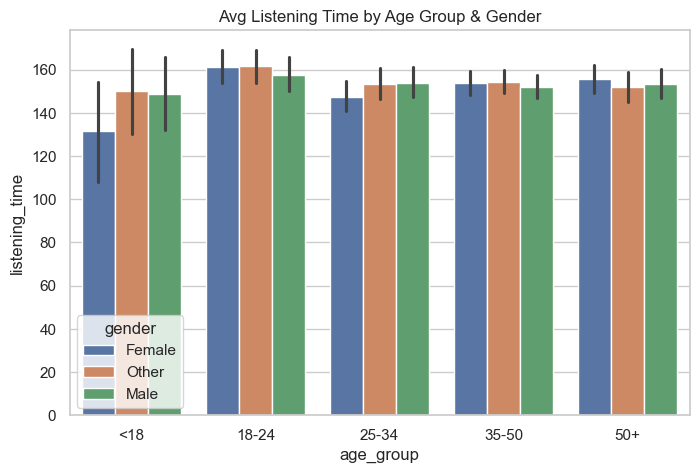

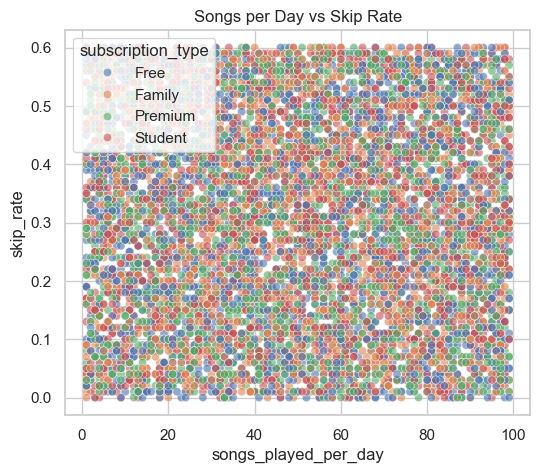

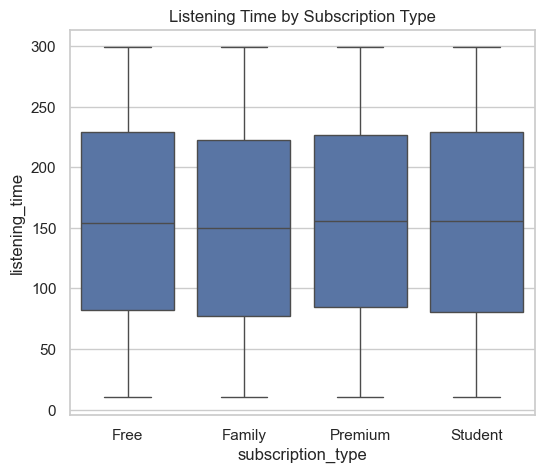

In [26]:
# 4. Exploratory Data Analysis
# ==========================
# Avg. Listening Time by Age Group & Gender
plt.figure(figsize=(8,5))
sns.barplot(x="age_group", y="listening_time", hue="gender", data=df)
plt.title("Avg Listening Time by Age Group & Gender")
plt.show()

# Songs per Day vs Skip Rate
plt.figure(figsize=(6,5))
sns.scatterplot(x="songs_played_per_day", y="skip_rate", hue="subscription_type", data=df, alpha=0.6)
plt.title("Songs per Day vs Skip Rate")
plt.show()

# Boxplot: Listening Time by Subscription
plt.figure(figsize=(6,5))
sns.boxplot(x="subscription_type", y="listening_time", data=df)
plt.title("Listening Time by Subscription Type")
plt.show()

In [27]:
# 5. Statistical Test
free_users = df[df['subscription_type'] == "Free"]["listening_time"]
premium_users = df[df['subscription_type'] == "Premium"]["listening_time"]

t_stat, p_val = ttest_ind(free_users, premium_users, equal_var=False)
print("T-Test: Free vs Premium")
print("T-statistic =", t_stat, " P-value =", p_val)

# Interpretation
if p_val < 0.05:
    print("✅ Significant difference in listening time between Free and Premium users")
else:
    print("❌ No significant difference found")

T-Test: Free vs Premium
T-statistic = -0.20111850929453465  P-value = 0.8406158437537652
❌ No significant difference found


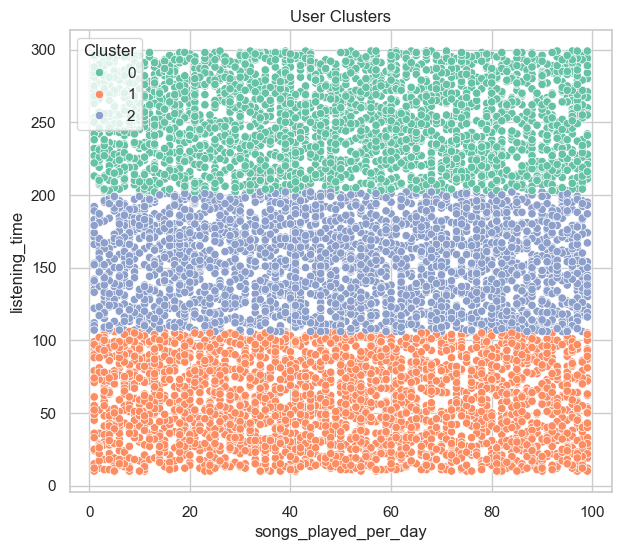

In [31]:
# 6. Clustering (K-means)
# Select features
features = df[["listening_time", "songs_played_per_day", "skip_rate"]]

# Handle missing or scaling if needed
features = features.fillna(0)

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)

# Plot clusters
plt.figure(figsize=(7,6))
sns.scatterplot(x="songs_played_per_day", y="listening_time", hue="Cluster", data=df, palette="Set2")
plt.title("User Clusters")
plt.show()


In [32]:
# 7. Export Clean Data for SQL / Power BI

df.to_csv("Spotify_streaming_cleaned.csv", index=False)
print("✅ Clean dataset saved for SQL & Power BI integration")

✅ Clean dataset saved for SQL & Power BI integration
